# Testing file - generate graphs w/ dictionary

In [32]:
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [19]:
# generate random data for testing
card_wins = np.random.uniform(0, 1, (8, 8))
np.fill_diagonal(card_wins, None)
card_ties = np.random.uniform(0, 1, (8, 8))
np.fill_diagonal(card_ties, None)
trick_wins = np.random.uniform(0, 1, (8, 8))
np.fill_diagonal(trick_wins, None)
trick_ties = np.random.uniform(0, 1, (8, 8))
np.fill_diagonal(trick_ties, None)
total_iterations = 1693

In [20]:
vis_dict = {'cards':card_wins, 'cards_ties': card_ties, 'tricks':trick_wins, 
             'tricks_ties':trick_ties, 'n':total_iterations}

In [23]:
def create_heatmap(graph_format:str):
    '''
    takes in variable graph_format which should be either 'html', 'png', or 'both'. Takes in dictionary with four 
    8x8 arrays (card wins, card ties, trick wins, trick ties) and the number of total iterations. Calls functions
    to create visualizations specified. Saves whichever functions are specified. 
    '''
    
    data = vis_dict # would import dictionary as json
    
    # load data from dictionary
    cards = data['cards']
    cards_ties = data['cards_ties']
    tricks = data['tricks']
    tricks_ties = data['tricks_ties']
    n = data['n']

    # call get_labels function to make array w/ labels
    cards_labels, tricks_labels = get_labels(cards, cards_ties, tricks, tricks_ties)  

    # generate and save html
    if graph_format == 'html' or graph_format == 'both':
        create_html(cards, cards_labels, tricks, tricks_labels)

    # generate and save png
    if graph_format == 'png' or graph_format == 'both':
        create_png(cards, cards_labels, tricks, tricks_labels)

    # in case of invalid input
    if graph_format != 'html' and graph_format != 'png' and graph_format != 'both':
        print('graph type not supported')
    
    return None

In [22]:
def get_labels(cards, cards_ties, tricks, tricks_ties):
    '''
    create labels for the graph
    '''

    # prep data for labels
    cards_prep = np.transpose(np.round((cards)*100,0))
    cards_ties_prep = np.transpose(np.round((cards_ties)*100,0))
    tricks_prep = np.transpose(np.round((tricks)*100,0))
    tricks_ties_prep = np.transpose(np.round((tricks_ties)*100,0))

    # creating the arrays for labels for cards
    cards_labels = []
    for i in range(8):
        for j in range(8):
            label = str(cards_prep[i][j])[:-2] + ' (' + str(cards_ties_prep[i][j])[:-2] + ')'
            cards_labels += [label]
    cards_labels = np.reshape(cards_labels, (8,8))
    np.fill_diagonal(cards_labels, "")

    # creating the arrays for labels for tricks
    tricks_labels = []
    for i in range(8):
        for j in range(8):
            label = str(tricks_prep[i][j])[:-2] + ' (' + str(tricks_ties_prep[i][j])[:-2] + ')'
            tricks_labels += [label]
    tricks_labels = np.reshape(tricks_labels, (8,8))
    np.fill_diagonal(tricks_labels, "")
    
    return cards_labels, tricks_labels


In [25]:
def create_html(cards, cards_labels, tricks, tricks_labels):

    # Create html for cards
    fig = go.Figure(data = go.Heatmap(
                   z = cards, colorscale = 'blues', # 'RdYlGn' or 'RdBu' or 'Oranges' or 'Fall_r'
                   hovertemplate = "%{y}:%{x} win ratio <br />%{z}", name = "", # the name part stops 'trace=0' from popping up
                   text=cards_labels, texttemplate='%{text}',  
                   x = ['RRR', 'RRB', 'RBR', 'RBB', 'BRR', 'BRB', 'BBR', 'BBB'],
                   y = ['RRR', 'RRB', 'RBR', 'RBB', 'BRR', 'BRB', 'BBR', 'BBB'],
                   hoverongaps = False,
                   colorbar=dict(
                        tickformat=".0%"
                   )))
    
    fig.update_layout(
        
        title=f'Penney Game<br>My Win Percentage (and Tie Percentage) By Cards<br> Total Games: {total_iterations}',
        title_x = 0.5,
        title_y = 0.95,
        title_font_size = 20,
        plot_bgcolor = 'white',
        xaxis = dict(
            title = 'My Choice'  
        ),
        yaxis = dict(
            title = "Opponent's Choice"
        ),
        width = 600,
        height = 600
        )
    
    fig.update_traces(
        xgap = 1, ygap = 1
        )

    path = f"figures/heatmap_cards_.html"
    fig.write_html(path)
    
    fig.show()

#######
    
    # Create html for tricks
    fig = go.Figure(data = go.Heatmap(
                   z = tricks, colorscale = 'blues', # 'RdYlGn' or 'RdBu' or 'Oranges' or 'Fall_r'
                   hovertemplate = "%{y}:%{x} win ratio <br />%{z}", name = "", # the name part stops 'trace=0' from popping up
                   text=tricks_labels, texttemplate='%{text}',  
                   x = ['RRR', 'RRB', 'RBR', 'RBB', 'BRR', 'BRB', 'BBR', 'BBB'],
                   y = ['RRR', 'RRB', 'RBR', 'RBB', 'BRR', 'BRB', 'BBR', 'BBB'],
                   hoverongaps = False,
                   colorbar=dict(
                        tickformat=".0%"
                   )))
    
    fig.update_layout(
        
        title=f'Penney Game<br>My Win Percentage (and Tie Percentage) By Tricks<br> Total Games: {total_iterations}',
        title_x = 0.5,
        title_y = 0.95,
        title_font_size = 20,
        plot_bgcolor = 'white',
        xaxis = dict(
            title = 'My Choice'  
        ),
        yaxis = dict(
            title = "Opponent's Choice"
        ),
        width = 600,
        height = 600
        )
    
    fig.update_traces(
        xgap = 1, ygap = 1
        )

    path = f"figures/heatmap_tricks_.html"
    fig.write_html(path)
    
    fig.show()

In [51]:
def create_png(cards, cards_labels, tricks, tricks_labels):

    plt.figure(figsize=(10,8))
    sns.heatmap(cards,
                #annot=cards_labels,
                cmap="Blues",
                linewidths=.50,
                annot_kws={"size": 10}
                cbar_kws={'label': 'Win Probability', 
                'format': mtick.PercentFormatter(xmax=1, decimals=0)})
    plt.title('Win Probabilities for Card Scoring')
    plt.xlabel('Player 2 Choice')
    plt.ylabel('Player 1 Choice')
    plt.savefig('figures/num_card_probs.png', bbox_inches = 'tight')
    
    return None

SyntaxError: invalid syntax. Perhaps you forgot a comma? (661127045.py, line 8)

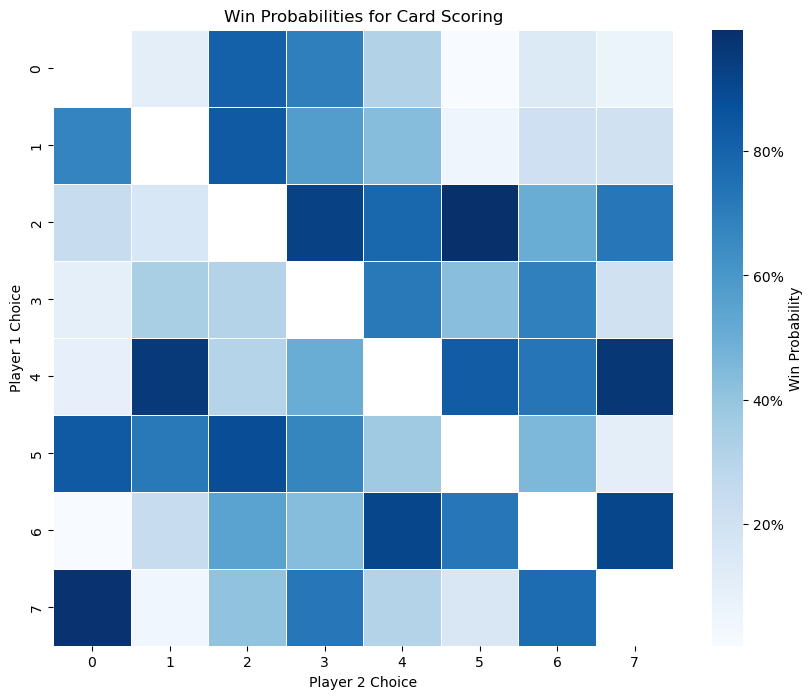

In [52]:
create_heatmap('png')